# REDES NEURONALES

---



En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

import matplotlib.pyplot as plt

En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

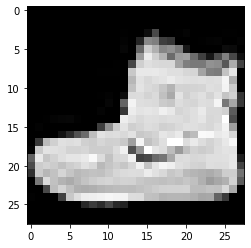

In [4]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

## **1. Información sobre el dataset**

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [6]:
### Tu código aquí ###
print("training_images_shape:", training_images.shape)
print("len_train_labels:", len(training_labels))
print("test_images_shape:", test_images.shape)
print("len_test_labels:", len(test_labels))

training_images_shape: (60000, 28, 28)
len_train_labels: 60000
test_images_shape: (10000, 28, 28)
len_test_labels: 10000


*Tu respuesta aquí*

El conjunto de datos contiene 70.000 imágenes en escala de grises, dichas imágenes son de prendas de ropa de 28x28 pixeles. Se usan 60.000 imágenes para el conjunto de entrenamiento, asimismo, hay 60.000 etiquetas. Hay 10.000 imágenes para el conjunto de evaluación (test) y de igual manera, el set de pruebas contiene también 10.000 etiquetas.

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [7]:
### Tu código aquí ###

# Se muestran los vaores de las etiquetas
training_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

<function matplotlib.pyplot.show>

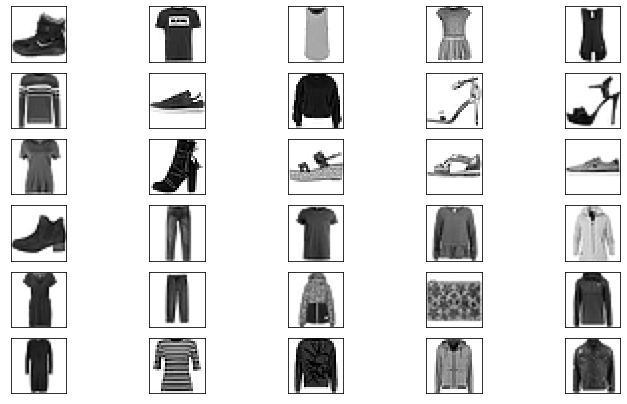

In [8]:
### Visualización de las 30 primeras imágenes del conjunto de datos

plt.figure(figsize=(12,12))
for i in range(30):
  plt.subplot(10,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(training_images[i], cmap=plt.cm.binary)
plt.show

*Tu respuesta aquí*

Como ya se ha mencionado, las imágenes son matrices Numpy de 28x28 pixeles, con valores que van desde 0 a 255. Como se observó, las etiquetas (labels) son una matriz de enteros, que van de 0 a 9, las cuales corresponden a la clase o tipo de categoría a la que pertenece la prenda representada en la imagen.

## **2. Creación del Modelo**

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 2.1 (2 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

### **Definición del Modelo**

La red neuronal será configurada con 1 capa oculta, una capa de entrada y una de salida densamente conectadas:

* La capa de entrada fue configurada con el método Flatten, con el cual podemos transformar el formato de las imagenes de un array bi-dimensional (28x28 pixeles) a un array uni dimensional (de 784 pixeles).

* La capa oculta fue configurada con 128 neuronas y una función de activación sigmoide. 

* La capa de salidad fue configurada con 10 neuronas, lo que indica que devolverá un vector con 10 valores de probabilidad. Cada valor del vector representará el nivel de confianza con el que el modelo clasifica una imagen en alguna de las 10 categorías o clases de ropa posibles en el dataset. Para la capa de salida indicamos una función de activación 'softmax' la cual se utiliza en problemas de clasificación con múltiples clases en la variable de salida, justamente como es nuestro caso. 

In [9]:
from matplotlib.cbook import flatten
from tensorflow.keras.layers import Flatten

### Tu código para la red neuronal de la pregunta 2 aquí ###

model = Sequential()
model.add(Flatten(input_shape=(28, 28))) # Esta capa no tiene parámetros que aprender, solo reformatea el set de datos.
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation= 'softmax'))

# Revisamos la arquitectura de la red
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### **Compile**

Antes de hacer el entrenamiento de la red neuronal, con el método compile se pueden especificar ciertos parámetros que ayudarán a definir el proceso de aprendizaje de la red neuronal, en nuestro caso se definirán los siguientes:

* **Función de Pérdida (loss):** Es necesaria para evaluar el grado de error entre las salidas predichas y las salidas reales. En nuestro caso, se especifica como función de coste ```sparse_categorical_crossentropy```, ya que nuestro tarea está basada en un problema de clasificación múltiple y la variable de salida debe tomar un valor entre 10 posibles clases. 


* **Optimizer:** Este parámetro permite ajustar gradualmente los pesos del modelo para minimizar la función de coste, esto lo hace a través del algoritmo de descenso del gradiente. La API de Keras tiene varios tipos de optimizadores, los cuales son variantes del algoritmo de descenso del gradiente, en este caso se utiliza `adam`.

* **Metrics:** Para evaluar el modelo se utiliza la métrica `accuracy`, que nos indica la fracción de imágenes que estarían correctamente clasificadas.



In [10]:
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

### **Entrenamiento del Modelo**

Mediante el método `fit()` se entrena el modelo. Para entrenar el modelo definimos 10 `epochs`, lo cual significa que los datos pasarán por la red neuronal 10 veces durante el entrenamiento. 

Se define un `batch_size` de 64, lo que significa que el modelo está dividiendo los datos en un tamaño de 64 lotes en cada iteración del entrenamiento. 


In [11]:
%%time
history = model.fit(training_images, training_labels, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 0.5891 - accuracy: 0.8062
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.4114 - accuracy: 0.8538
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3737 - accuracy: 0.8655
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3499 - accuracy: 0.8742
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3323 - accuracy: 0.8799
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3167 - accuracy: 0.8853
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3042 - accuracy: 0.8900
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2912 - accuracy: 0.8946
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2826 - accuracy: 0.8971
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2739 - accuracy: 0.9001

Para concluir el entrenamiento de la red neuronal, una buena practica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2.2 (0.5 puntos)**: evalua el modelo con las imagenes y etiquetas test.

In [12]:
### Tu código para la evaluación de la red neuronal de la pregunta 2 aquí ###

## Para realizar la evaluación del modelo lo haremos utilizando el conjunto de datos de prueba (test)
test_loss, test_acc = model.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3337 - accuracy: 0.8790


In [13]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8790000081062317


**Nota:** Se observa que el resultado del accuracy sobre los datos de test es aproximadamente el mismo accuracy que en los datos de entrenamiento.

Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

## **3. Funcionamiento de las predicción de la red neuronal**

Sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador con las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto, y qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada#  de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [14]:
### Tu código del clasificador de la pregunta 3 aquí ###

## Crea una variable llamada classifications
## Esta varible contiene la predicción de la etiqueta para cada imagen en el set de datos de test
classifications = model.predict(test_images)

## Se imprime la primera predicción
classifications[0]

array([5.8600162e-06, 2.3830977e-07, 4.0132672e-06, 4.7092708e-06, 1.1653423e-05, 6.4576385e-03, 1.7038803e-05, 1.7344996e-02, 1.7338968e-04, 9.7598052e-01], dtype=float32)

In [15]:
# Con la función argmax se puede ver cuál es la etiqueta (labels) que tiene el valor de confianza más alto.
# argmax devuelve la posición (índice) del valor máximo a lo largo del vector y el valor máximo lo indica la función max
print("La etiqueta/clase de la primera entrada es:", np.argmax(classifications[0]))
print("El nivel de confianza más alto es:", np.max(classifications[0]))

La etiqueta/clase de la primera entrada es: 9
El nivel de confianza más alto es: 0.9759805


In [16]:
# Verificamos las etiquetas en el conjunto de test y vemos que la clasificación que hace el modelo es correcta
test_labels[0]

9

También podemos comprobar que el resultado de la predicción es un vector cuya suma es igual a 1, lo que indica de nuevo, que la predicción es correcta

In [17]:
np.sum(classifications[0])

1.0

**Tu respuesta a la pregunta 3.1 aquí:**

Cuando hacemos la predicción sobre un elemento la salida es un vector de números, en el que cada número representa el nivel de confianza con el que el modelo clasifica un elemento dentro de una clase u otra. Es importante notar que la posición que tiene cada número es una clase o categoría. 

En este caso, la predicción es un vector con 10 números y cada uno de ellos representa el nivel de confianza con la que el modelo clasifica la imagen en alguna de las 10 categorías de ropa. El vector tiene 10 posiciones/índices puesto que nuestro dataset tiene 10 etiquetas, las cuales son las categorías de ropa. De esta manera, el índice o la posición que contiene el valor más alto representa el nivel de confianza más alto con la que el modelo clasifica la imagen, es decir, nos dice qué tan probable es que la imágen esté en esa categoría de ropa. Para nuestro caso el elemento uno fue clasificado en la clase 9, ya que como se vió antes, la posición 9 del vector de números es la que contiene el valor del nivel de confianza más alto con 0.835 de certeza. Finalmente, si sumamos los valores del vector notamos que el resultado es 1 lo que quiere decir que el modelo ha clasificado correctamente la imagen. 

**Tu respuesta a la pregunta 3.2 aquí:**

La clase de la primeta entrada es 9.

# **4. Impacto variar el número de neuronas en las capas ocultas**

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y su capa oculta cambia las 128 neuronas:

* **512 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

y entrena la red en ambos casos.



In [18]:
### Tu código para 512 neuronas aquí ###

model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28))) # Esta capa no tiene parámetros que aprender, solo reformatea el set de datos.
model2.add(Dense(512, activation='sigmoid'))
model2.add(Dense(10, activation= 'softmax'))

# Revisamos la arquitectura de la red
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [19]:
model2.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
%%time
history2 = model2.fit(training_images, training_labels, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 6s 7ms/step - loss: 0.5333 - accuracy: 0.8123
Epoch 2/10
938/938 [==============================] - 6s 7ms/step - loss: 0.4021 - accuracy: 0.8545
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3631 - accuracy: 0.8671
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3374 - accuracy: 0.8770
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3152 - accuracy: 0.8844
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2987 - accuracy: 0.8906
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2840 - accuracy: 0.8957
Epoch 8/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2711 - accuracy: 0.8996
Epoch 9/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2575 - accuracy: 0.9033
Epoch 10/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2474 - accuracy: 0.9084

In [21]:
## Para realizar la evaluación del modelo lo haremos utilizando el conjunto de datos de prueba
test_loss, test_acc = model2.evaluate(test_images,  test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.3312 - accuracy: 0.8796


In [22]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8795999884605408


In [23]:
### Tu código para 1024 neuronas aquí ###

model3 = Sequential()
model3.add(Flatten(input_shape=(28, 28))) # Esta capa no tiene parámetros que aprender, solo reformatea el set de datos.
model3.add(Dense(1024, activation='sigmoid'))
model3.add(Dense(10, activation= 'softmax'))

# Revisamos la arquitectura de la red
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 1024)              803840    
                                                                 
 dense_5 (Dense)             (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [24]:
model3.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
%%time
history3 = model3.fit(training_images, training_labels, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 11s 11ms/step - loss: 0.5261 - accuracy: 0.8136
Epoch 2/10
938/938 [==============================] - 11s 11ms/step - loss: 0.4045 - accuracy: 0.8541
Epoch 3/10
938/938 [==============================] - 10s 11ms/step - loss: 0.3662 - accuracy: 0.8680
Epoch 4/10
938/938 [==============================] - 11s 12ms/step - loss: 0.3375 - accuracy: 0.8773
Epoch 5/10
938/938 [==============================] - 11s 11ms/step - loss: 0.3140 - accuracy: 0.8851
Epoch 6/10
938/938 [==============================] - 11s 12ms/step - loss: 0.2943 - accuracy: 0.8908
Epoch 7/10
938/938 [==============================] - 11s 11ms/step - loss: 0.2771 - accuracy: 0.8978
Epoch 8/10
938/938 [==============================] - 11s 11ms/step - loss: 0.2638 - accuracy: 0.9024
Epoch 9/10
938/938 [==============================] - 11s 11ms/step - loss: 0.2487 - accuracy: 0.9059
Epoch 10/10
938/938 [==============================] - 11s 11ms/step - loss: 0.237

In [26]:
## Para realizar la evaluación del modelo lo haremos utilizando el conjunto de datos de prueba
test_loss, test_acc = model3.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3390 - accuracy: 0.8820


In [27]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8820000290870667


**pregunta 4.1 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal? Tu respuesta a la pregunta 4.1 aquí:

El primer impacto que se observa es un aumento en el tiempo del entrenamiento. Como se puede ver, en el modelo con 128 neuronas el tiempo de entrenamiento fue de 41.8 segundos, cuando el modelo se entrenó con 512 neuronas el tiempo de entrenamiento aumentó a 1 minuto y 4 segundos y finalmente cuando se entrenó el modelo con 1024 neuronas el tiempo auemnentó a 1 minuto y 49 segundos, lo que indica que una cantidad grande de neuronas en las capas ocultas puede aumentar el tiempo de entrenamiento de manera considerable y si se sigue aumentando la cantidad de neuronas puede llegar el punto de sea imposible entrenar adecuadamente la red neuronal en el tiempo necesario y además no sean suficientes los recursos computacionales.

Por otro lado, usar demasiadas neuronas en las capas oculatas también podría causar probemas de sobreentrenamiento. 


Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 4.2 (0.25 puntos)**: 

* ¿En que clase esta clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 4.3 (0.25 puntos)**: 

* ¿Porque crees que ha ocurrido esto?

In [28]:
### Tu código del clasificador de la pregunta 5 aquí ###
## Esta varible contiene la predicción de la etiqueta para cada imagen en el set de datos de test
classifications2 = model2.predict(test_images)

## Se imprime la primera predicción
classifications2[0]

array([5.1997017e-07, 1.3978372e-07, 7.7045388e-07, 4.5369472e-07, 2.4963374e-06, 6.8446179e-03, 3.8949609e-05, 6.6598371e-02, 6.2424690e-05, 9.2645133e-01], dtype=float32)

In [29]:
print("La etiqueta/clase de la primera entrada en el modelo2 es:", np.argmax(classifications2[0]))
print("El nivel de confianza más alto es:", np.max(classifications2[0]))

La etiqueta/clase de la primera entrada en el modelo2 es: 9
El nivel de confianza más alto es: 0.9264513


In [30]:
## Esta varible contiene la predicción de la etiqueta para cada imagen en el set de datos de test
classifications3 = model3.predict(test_images)

## Se imprime la primera predicción
classifications3[0]

array([1.6892989e-07, 8.4007006e-08, 4.9875632e-07, 7.4454761e-08, 6.0219821e-07, 1.2548610e-02, 1.2424794e-06, 1.3131756e-02, 2.8972012e-05, 9.7428799e-01], dtype=float32)

In [31]:
print("La etiqueta/clase de la primera entrada en el modelo3 es:", np.argmax(classifications3[0]))
print("El nivel de confianza más alto es:", np.max(classifications3[0]))

La etiqueta/clase de la primera entrada en el modelo3 es: 9
El nivel de confianza más alto es: 0.974288


**Tu respuesta a la pregunta 5.1 aquí:**

El modelo sigue clasificando la primera prenda de vestir en la clase 9 pero con niveles de confianza más altos y cada vez más cercanos al 100%. De igual manera,cada vez que se aumentaron la cantidad de neuronas en la red se obtuvieron incrementos en el porcentaje de accuracy aunque no de manera significativa, asñi mismo, se observa que tanto el training loss y el test loss, es decir, el error calculado por la función de pérdida en los datos de entrenamiento y de test también disminuyeron gradualmente con el aumento del número de neuronas pero esas diminuciones fueron cada vez en proporciones menores. 

**Tu respuesta a la pregunta 5.2 aquí:**

Puede ocurrir lo anteriormente descrito porque hay un punto en el que aumentar la cantidad de neuronas no produce necesariamente mejoras en la predicción, al contrario, si seguimos aumentando demasiadas neuronas lo que vamos a pobocar es un sobreentrenamiento, es decir, la red neuronal va a ser incapaz de generalizar frente a datos nuevos, además de que el tiempo y la cantidad de recursos computacionales pueden llegar a ser insuficientes.

# **5. Capa Flatten**

En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 5 (0.5 puntos):** ¿puedes explicar porque da el error que da?



In [32]:
### Tu código de la red neuronal sin capa flatten de la pregunta 6 aquí ###

model = Sequential()
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation= 'softmax'))

# Revisamos la arquitectura de la red
model.summary()

ValueError: ignored

**Tu respuesta a la pregunta 6 aquí:**

Una de las transformaciones habituales que se debe hacer en los modelos de deep learning es la vectorización, la cual consiste en cambiar la forma de los tensores sin cambiar los datos. Cambiar la forma del tensor significa que vamos a reorganizar sus filas y columnas para que converjan con la forma que necesitamos y facilitar la entrada de datos a la red neuronal. 

En el caso del dataset que se está utilizando es necesario hacer la transformación de un tensor de 2 dimensiones a un vector de 1 dimensión, es decir, la matriz de pixeles que tenemos de 28x28 se debe representar con un vector o array de 784 pixeles que es el formato que acepta como entrada una red neuronal densamente conectada. Lo anterior se puede hacer en Keras utilizando la capa `keras.layers.Flatten()`. Si no se utiliza esta capa o hacemos de alguna manera esta transformación a nuestros datos la red no podrá ingerir los datos. 

# **6. Número de neuronas de la capa de salida**
Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 6.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 6.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [33]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 7 aquí ###
model4 = Sequential()
model4.add(Flatten(input_shape=(28, 28))) 
model4.add(Dense(128, activation='sigmoid'))
model4.add(Dense(5, activation= 'softmax'))

# Revisamos la arquitectura de la red
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 5)                 645       
                                                                 
Total params: 101,125
Trainable params: 101,125
Non-trainable params: 0
_________________________________________________________________


In [34]:
model4.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
%%time
history4 = model4.fit(training_images, training_labels, epochs=10, batch_size=64)

Epoch 1/10


InvalidArgumentError: ignored

**Tu respuestas a la pregunta 6.1 aquí:**

La última capa debe ser entrenada con 10 neuronas porque nuestro caso es un problema es de clasificación de imágenes con **10 clases (etiquetas)** que representan una categoría de ropa. En consecuencia la salida de la red debe ser un vector con 10 posiciones, donde las posiciones corresponden a cada una de las 10 etiquetas definidas en nuestro dataset y que la red neuronal debe clasificar con un porcentaje de confianza. 


**Tu respuestas a la pregunta 6.2 aquí:**

Si se configura una capa de salida con menos de 10 neuronas lo que ocurrirá es que no podremos entrenar el modelo porque el set de datos que contiene las etiquetas estaría por fuera del rango, por lo que cuando se intente entrenar el modelo obtendremos un error, tal cual como sucedió. 

# **7. Aumento de epoch y su efecto en la red neuronal**
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 7.1 (0.15 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 7.2 (0.15 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 7.3 (0.30 puntos)**
* ¿Porque que piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

**Modelos para 15 epochs**

In [36]:
### Tu código para 15 epoch aquí ###
model5 = Sequential()
model5.add(Flatten(input_shape=(28, 28))) # Esta capa no tiene parámetros que aprender, solo reformatea el set de datos.
model5.add(Dense(128, activation='sigmoid'))
model5.add(Dense(10, activation= 'softmax'))

# Revisamos la arquitectura de la red
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [37]:
model5.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
%%time
history5 = model5.fit(training_images, training_labels, epochs=15, batch_size=64)

Epoch 1/15
938/938 [==============================] - 4s 4ms/step - loss: 0.5909 - accuracy: 0.8038
Epoch 2/15
938/938 [==============================] - 4s 4ms/step - loss: 0.4115 - accuracy: 0.8523
Epoch 3/15
938/938 [==============================] - 4s 4ms/step - loss: 0.3745 - accuracy: 0.8652
Epoch 4/15
938/938 [==============================] - 3s 4ms/step - loss: 0.3499 - accuracy: 0.8740
Epoch 5/15
938/938 [==============================] - 4s 4ms/step - loss: 0.3302 - accuracy: 0.8809
Epoch 6/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3163 - accuracy: 0.8855
Epoch 7/15
938/938 [==============================] - 3s 4ms/step - loss: 0.3028 - accuracy: 0.8898
Epoch 8/15
938/938 [==============================] - 4s 4ms/step - loss: 0.2915 - accuracy: 0.8946
Epoch 9/15
938/938 [==============================] - 6s 7ms/step - loss: 0.2823 - accuracy: 0.8964
Epoch 10/15
938/938 [==============================] - 6s 6ms/step - loss: 0.2712 - accuracy: 0.9007

In [39]:
## Para realizar la evaluación del modelo lo haremos utilizando el conjunto de datos de prueba (test)
test_loss, test_acc = model5.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3342 - accuracy: 0.8792


In [40]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8791999816894531


**Modelo para 30 epochs**

In [42]:
### Tu código para 30 epoch aquí ###
model6 = Sequential()
model6.add(Flatten(input_shape=(28, 28))) # Esta capa no tiene parámetros que aprender, solo reformatea el set de datos.
model6.add(Dense(128, activation='sigmoid'))
model6.add(Dense(10, activation= 'softmax'))

# Revisamos la arquitectura de la red
model6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [43]:
model6.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
%%time
history6 = model6.fit(training_images, training_labels, epochs=30, batch_size=64)

Epoch 1/30
938/938 [==============================] - 4s 4ms/step - loss: 0.5950 - accuracy: 0.8022
Epoch 2/30
938/938 [==============================] - 3s 4ms/step - loss: 0.4110 - accuracy: 0.8532
Epoch 3/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3730 - accuracy: 0.8667
Epoch 4/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3494 - accuracy: 0.8745
Epoch 5/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3315 - accuracy: 0.8797
Epoch 6/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3159 - accuracy: 0.8855
Epoch 7/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3021 - accuracy: 0.8900
Epoch 8/30
938/938 [==============================] - 3s 3ms/step - loss: 0.2910 - accuracy: 0.8946
Epoch 9/30
938/938 [==============================] - 3s 4ms/step - loss: 0.2813 - accuracy: 0.8977
Epoch 10/30
938/938 [==============================] - 3s 3ms/step - loss: 0.2721 - accuracy: 0.9004

In [45]:
## Para realizar la evaluación del modelo lo haremos utilizando el conjunto de datos de prueba (test)
test_loss, test_acc = model6.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3303 - accuracy: 0.8883


In [46]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8883000016212463


**Tu respuesta a la pregunta 7.3 aquí:**

Se observa que la loss (fución de pérdida) en el conjunto de entrenamiento disminuye cuando aumenta cada epoch y a su vez, el accuracy va aumentando con cada epoch, este comportamiento es lo que se esperaría puesto que se está minimizando la función de pérdida, sin embargo, no es el caso de la loss y el accuracy en el conjunto de evaluación, cuando se aumentaron las epochs de 15 a 30 los resultados en el conjunto de evaluación fueron diferentes, si bien la loss disminuyó y el accuracy aumentó no lo hicieron de manera significativa y probablemente si seguimos aumentando las epochs seguirá mejorando estas métricas en el conjunto de entrenamiento pero en el de evaluación se detendrán o incluso empeorarán. A este comportamiento es lo que se conoce como sobreajuste, en este caso, para evitarlo se puede dejar de entrenar después de un cierto número de epochs. Lo anterior simplemente quiere decir que un modelo que se desempeñe bien con los datos de entrenamiento no necesariamente lo hará bien con datos nuevos, pues ha perdido su capacidad de generalización.

# **8. Early stop**
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [ ]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Ejercicio 8 *(0.75 puntos)***: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [47]:
import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<= 0.40): # Se cancela el entrenamiento cuando la función de pérdida minimiza el error al 40% o menos
              print("\nAlcanzado el 40% de pérdida, se cancela el entrenamiento!!")
              self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

2.8.0
Epoch 1/50
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4759 - accuracy: 0.8312
Epoch 2/50
1866/1875 [============================>.] - ETA: 0s - loss: 0.3609 - accuracy: 0.8688
Alcanzado el 40% de pérdida, se cancela el entrenamiento!!
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3605 - accuracy: 0.8689


## 9. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 9 *(0.75 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

**Modelo utilizando la función de activación ReLu**


In [48]:
%%time
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model.fit(training_images, training_labels, epochs=15)

2.8.0
Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5705 - accuracy: 0.7946
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4253 - accuracy: 0.8457
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3976 - accuracy: 0.8535
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3765 - accuracy: 0.8606
Epoch 5/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3626 - accuracy: 0.8647
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3545 - accuracy: 0.8675
Epoch 7/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3429 - accuracy: 0.8707
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3367 - accuracy: 0.8738
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3307 - accuracy: 0.8751
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss:

**Modelo utilizando la función de activación sigmoid**

In [49]:
%%time
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(10, activation=tf.nn.sigmoid),
                                    tf.keras.layers.Dense(512, activation=tf.nn.sigmoid),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model.fit(training_images, training_labels, epochs=15)

2.8.0
Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8885 - accuracy: 0.6722
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4882 - accuracy: 0.8279
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4393 - accuracy: 0.8447
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4188 - accuracy: 0.8508
Epoch 5/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4038 - accuracy: 0.8565
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3944 - accuracy: 0.8587
Epoch 7/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3848 - accuracy: 0.8619
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3790 - accuracy: 0.8660
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3739 - accuracy: 0.8658
Epoch 10/15
1875/1875 [==============================] - 5s 2ms/step - loss:

**Análisis funciones de Activación**

La función sigmoide puede tomar cualquier rango de valores desde negativos hasta positivos, pero la característica principal de esta función es que el rango de salida está entre cero y uno precisamente porque lo que se quiere es clasificar los datos en dos categorías, esta función hace referencia a lo que se conoce como función logística, utilizada en problemas de clasificación binaria. Sin embargo, esta función tiene un inconveniente y es que para ciertos valores de entrada si son muy negativos, la función sigmoide se satura, es decir, se mantiene practicamente en cero para ese rango de valores y lo mismo ocurre cuando los valores de entrada son muy positivoso o muy altos, la función se satura a valores de 1. El inconveniente de lo anteriormente descrito es que dado que durante el entrenamiento de la red neuronal los valores se saturan el proceso  de entrenamiento puede tomar mucho más tiempo o incluso puede ser que no converja al mínimo que estamos buscando, es decir, que no llegue nunca al mínimo absoluto.

Por otro lado y contrario a la función sigmoide, la función ReLu convierte todos los valores de entrada negativos a cero en la salida y cuando los valores de entrada son positivos devuelve los mismos valores a la salida, es decir, no sufren ninguna modificación. Lo anterior, permite concluir que el problema de saturación que se presenta en la función sigmoide, en la función ReLu no se presenta. No hay ninguna saturación porque el rango de valores de salida puede estar entre cero y cualquier valor tan alto como sea el valor de entrada. Entonces la función no presenta las limitaciones ocasionadas por la saturación por lo tanto, cuando se utiliza el algoritmo del gradiente descendente generalmente converge mucho más rápido facilitando el entrenamiento y optimizando los recursos computacionales.

En conclusión, el principal inconveniente de las función sigmoide es la saturación de sus valores de salida, esto dificulta el proceso de entrenamiento al no permitir la rápida minimización de la función de perdida usando el método del Gradiente Descendente, por lo anterior se sugiere usar las funciones sigmoide únicamente en las capas de salida, para tareas de clasificación binaria o la softmax para tareas de clasificación de multiclases, por otro lado, lo recomendable es utilizar la función ReLu en las capas ocultas teniendo cuidado de establecer la tasa de aprendizaje y no permitir que la red tenga muchas neuronas "muertas".


## 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 10 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

**Inicialización en ceros**

In [50]:
## Tu código y comentarios de texto aquí

%%time
import numpy as np
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model10 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)), 
                             tf.keras.layers.Dense(10, activation='relu', kernel_initializer='zero', bias_initializer='zero'),
                             tf.keras.layers.Dense(512, activation='relu', kernel_initializer='zero', bias_initializer='zero'),
                             tf.keras.layers.Dense(64, activation='relu', kernel_initializer='zero', bias_initializer='zero'),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
])

model10.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

history10 = model10.fit(training_images, training_labels, epochs=15)

2.8.0
Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0967
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0973
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0983
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0979
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0996
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0984
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0985
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0980
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss:

In [51]:
## Para realizar la evaluación del modelo lo haremos utilizando el conjunto de datos de prueba (test)
test_loss, test_acc = model10.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1000


In [55]:
print('Test accuracy:', test_acc)

Test accuracy: 0.10000000149011612


**Inicialización con una variable aleatoria normal**

In [56]:
%%time
import numpy as np
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model101 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)), 
                             tf.keras.layers.Dense(10, activation='relu', kernel_initializer='random_uniform', bias_initializer='random_uniform'),
                             tf.keras.layers.Dense(512, activation='relu', kernel_initializer='random_uniform', bias_initializer='random_uniform'),
                             tf.keras.layers.Dense(64, activation='relu', kernel_initializer='random_uniform', bias_initializer='random_uniform'),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
])

model101.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

history101 = model101.fit(training_images, training_labels, epochs=15)

2.8.0
Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6070 - accuracy: 0.7798
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4472 - accuracy: 0.8352
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4104 - accuracy: 0.8481
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3881 - accuracy: 0.8560
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3732 - accuracy: 0.8621
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3619 - accuracy: 0.8649
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3538 - accuracy: 0.8680
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3450 - accuracy: 0.8717
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3384 - accuracy: 0.8726
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss:

In [57]:
## Para realizar la evaluación del modelo lo haremos utilizando el conjunto de datos de prueba (test)
test_loss, test_acc = model101.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3880 - accuracy: 0.8629


In [58]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8629000186920166


**Inicialización con los valores por defecto de Keras**

In [59]:
%%time
import numpy as np
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model102 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)), 
                             tf.keras.layers.Dense(10, activation='relu'),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
])

model102.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

history101 = model102.fit(training_images, training_labels, epochs=15)

2.8.0
Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5549 - accuracy: 0.7978
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4177 - accuracy: 0.8469
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3878 - accuracy: 0.8583
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3728 - accuracy: 0.8630
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3570 - accuracy: 0.8682
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3453 - accuracy: 0.8721
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3344 - accuracy: 0.8771
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3278 - accuracy: 0.8786
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3201 - accuracy: 0.8808
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss:

In [60]:
## Para realizar la evaluación del modelo lo haremos utilizando el conjunto de datos de prueba (test)
test_loss, test_acc = model102.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3982 - accuracy: 0.8652


In [61]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8651999831199646


Conclusión punto 10

Se puede observar que la inicialización mediante ceros, proporciona un muy bajo accuracy comparado con las otras dos estrategias.

Por otro lado, tanto la estradegía de inicialización a partir de una variable aleatoria normal o por los valores por defecto de Keras dan precisiones muy parecidas.

A nivel de tiempos se puede ver que la inicialización por defecto tarda unos segundos más en ejecutarse respecto a la estrategia de inicialización a partir de la variable aleatoria normal.



## 11. Optimizadores

**Ejercicio 11 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

**SGD**

In [62]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

%%time
import numpy as np
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model11 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)), 
                             tf.keras.layers.Dense(10, activation='relu'),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
])

model11.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

history11 = model11.fit(training_images, training_labels, epochs=15)

2.8.0
Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0431 - accuracy: 0.6148
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5733 - accuracy: 0.7976
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5040 - accuracy: 0.8216
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4731 - accuracy: 0.8324
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4520 - accuracy: 0.8385
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4357 - accuracy: 0.8435
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4234 - accuracy: 0.8473
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4138 - accuracy: 0.8499
Epoch 9/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4031 - accuracy: 0.8547
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss:

In [63]:
## Para realizar la evaluación del modelo lo haremos utilizando el conjunto de datos de prueba (test)
test_loss, test_acc = model11.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4189 - accuracy: 0.8474


In [64]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8474000096321106


**Adam**

In [65]:
%%time
import numpy as np
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model111 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)), 
                             tf.keras.layers.Dense(10, activation='relu'),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
])

model111.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

history111 = model111.fit(training_images, training_labels, epochs=15)

2.8.0
Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5680 - accuracy: 0.7926
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4314 - accuracy: 0.8417
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3973 - accuracy: 0.8542
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3779 - accuracy: 0.8617
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3638 - accuracy: 0.8650
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3537 - accuracy: 0.8691
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3447 - accuracy: 0.8729
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3374 - accuracy: 0.8753
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3298 - accuracy: 0.8774
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss:

In [66]:
## Para realizar la evaluación del modelo lo haremos utilizando el conjunto de datos de prueba (test)
test_loss, test_acc = model111.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3780 - accuracy: 0.8644


In [67]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8644000291824341


**RMSprop**

In [68]:
%%time
import numpy as np
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model112 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)), 
                             tf.keras.layers.Dense(10, activation='relu'),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
])

model112.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

history112 = model112.fit(training_images, training_labels, epochs=15)

2.8.0
Epoch 1/15
1875/1875 [==============================] - 60s 3ms/step - loss: 0.5624 - accuracy: 0.7951
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4289 - accuracy: 0.8462
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4088 - accuracy: 0.8539
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4051 - accuracy: 0.8572
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4042 - accuracy: 0.8578
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4107 - accuracy: 0.8569
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4149 - accuracy: 0.8571
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4189 - accuracy: 0.8566
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4211 - accuracy: 0.8560
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss

In [69]:
## Para realizar la evaluación del modelo lo haremos utilizando el conjunto de datos de prueba (test)
test_loss, test_acc = model112.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5607 - accuracy: 0.8434


In [70]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8434000015258789


**Conclusión punto 11:**

Como se puede observar, el optimizador adam tuvo mejores resultados en accuracy respecto a los resultados de accuracy de los optimizadores SGD y RMSprop. Sin embargo, el optimizador adam fue el que más tiempo tardó en entrenar, el más eficiente fue SGD.

## 12. Regularización y red final *(1.25 puntos)*

**Ejercicio 12 *(1 punto)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

In [71]:
## Tu modelo y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

%%time
import numpy as np
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model_final = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)), 
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(256, activation='relu'),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
])

model_final.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

history_final = model_final.fit(training_images, training_labels, epochs=15)

2.8.0
Epoch 1/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4696 - accuracy: 0.8311
Epoch 2/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3561 - accuracy: 0.8684
Epoch 3/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3195 - accuracy: 0.8819
Epoch 4/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2950 - accuracy: 0.8904
Epoch 5/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2773 - accuracy: 0.8950
Epoch 6/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2615 - accuracy: 0.9019
Epoch 7/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2476 - accuracy: 0.9056
Epoch 8/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2383 - accuracy: 0.9092
Epoch 9/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2255 - accuracy: 0.9145
Epoch 10/15
1875/1875 [==============================] - 14s 7ms/st

In [72]:
## Para realizar la evaluación del modelo lo haremos utilizando el conjunto de datos de prueba (test)
test_loss, test_acc = model_final.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3529 - accuracy: 0.8912


In [73]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8912000060081482


El accuracy obtenido sobre los datos de test es de 89% un valor muy cercano al 90%. Utilizando el optimizador Adam el cual siempre arrojó mejores resultados y como se vió anteriormente se aplicó la función de activación ReLu en las capas ocultas para evitar los problemas de saturación y buscar que el modelo converha de forma rápida. En la capa de salida se utilizó la función softmax.